# Model Training

### Import Data and Required Packages

In [1]:
## Basic Import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor

## Handle Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing dataset csv as dataframe with pandas library
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## creating a column called Total_Score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### Preparing X and Y variables for model training

In [8]:
X = df.drop(columns = ['total_score'], axis = 1) ## independent feature
y = df['total_score'] ## dependent feature

In [9]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [10]:
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [11]:
## create Column Transformer with 3 types of transformer
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

In [15]:
## Seperate dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

### Create a Evaluation Function to give all metrics after model training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost RFRegressor": XGBRFRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    ## Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate train and test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print()

    print('Model performance for Training set')
    print("- Mean Square Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-' * 35)

    print('Model performance for Test set')
    print("- Mean Square Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

Linear Regression

Model performance for Training set
- Mean Square Error: 0.0000
- Mean Absolute Error: 0.0000
- Root Mean Square Error: 0.0000
- R2 Score: 1.0000
-----------------------------------
Model performance for Test set
- Mean Square Error: 0.0000
- Mean Absolute Error: 0.0000
- Root Mean Square Error: 0.0000
- R2 Score: 1.0000


Lasso

Model performance for Training set
- Mean Square Error: 1.1330
- Mean Absolute Error: 0.8505
- Root Mean Square Error: 1.0644
- R2 Score: 0.9994
-----------------------------------
Model performance for Test set
- Mean Square Error: 1.2409
- Mean Absolute Error: 0.8764
- Root Mean Square Error: 1.1139
- R2 Score: 0.9994


Ridge

Model performance for Training set
- Mean Square Error: 0.0006
- Mean Absolute Error: 0.0195
- Root Mean Square Error: 0.0241
- R2 Score: 1.0000
-----------------------------------
Model performance for Test set
- Mean Square Error: 0.0007
- Mean Absolute Error: 0.0201
- Root Mean Square Error: 0.0264
- R2 Score: 1.00

### Results

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by = ['R2_Score'], ascending = False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
1,Lasso,0.999357
7,CatBoost Regressor,0.993457
5,Random Forest Regressor,0.993400
6,XGBoost RFRegressor,0.992515
4,Decision Tree Regressor,0.988244
8,AdaBoost Regressor,0.978796
3,K-Neighbors Regressor,0.956016


## We take Linear Regression

In [22]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 100.00


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

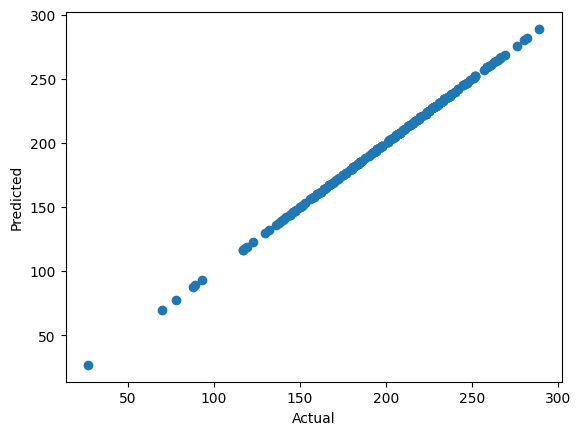

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='total_score'>

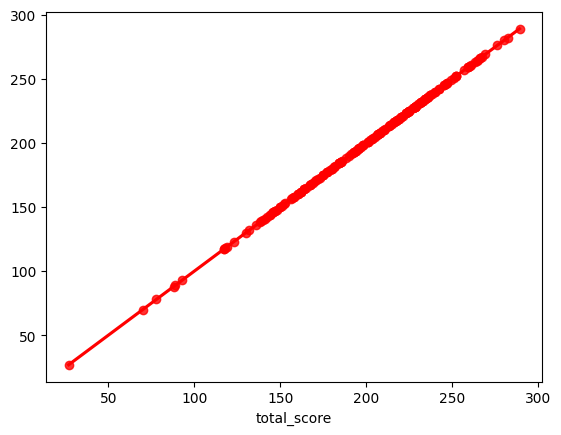

In [24]:
sns.regplot(x = y_test, y = y_pred, ci = None, color = 'red')

In [25]:
## Difference between Actual and Predicted values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Values': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Values,Difference
521,261,261.0,-5.684342e-14
737,192,192.0,-2.842171e-14
740,225,225.0,0.000000e+00
660,224,224.0,0.000000e+00
411,245,245.0,-5.684342e-14
...,...,...,...
408,165,165.0,0.000000e+00
332,171,171.0,2.842171e-14
208,231,231.0,-2.842171e-14
613,216,216.0,0.000000e+00
